In [22]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import json

# Load and Inspect Image

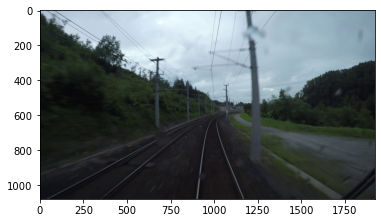

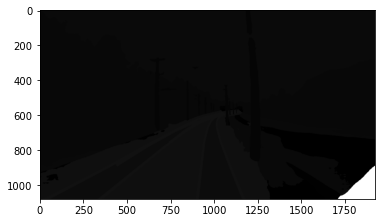

In [40]:
orig_img = cv2.imread('railsem19_data/jpgs/rs19_val/rs00000.jpg')
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.show()

img = cv2.imread('railsem19_data/uint8/rs19_val/rs00000.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

[[     0 118415]
 [     1  21653]
 [     2   1116]
 [     5  56914]
 [     8 655556]
 [     9 139285]
 [    12 114931]
 [    13    755]
 [    15 254074]
 [    17  53742]
 [   100 637307]
 [   255  19852]]


(array([140068.,   1116.,  56914.,      0., 794841.,      0., 115686.,
        254074.,  53742.,      0.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

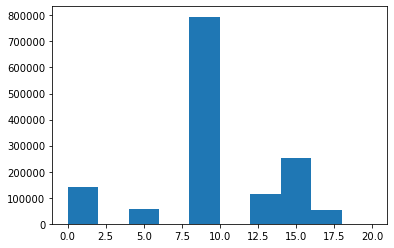

In [44]:
(unique, counts) = np.unique(img.ravel(), return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

plt.hist(img.ravel(), range=(0,20))

# Segment Rails

In [47]:
inp_json = json.load(open("railsem19_data/rs19-config.json", 'r'))

labels = {}
count = 0
for obj in inp_json["labels"]:
    labels[count] = obj["readable"]
    count += 1
labels

{0: 'Road',
 1: 'Sidewalk and train platforms',
 2: 'Construction (includes CS wall label)',
 3: 'Tram Track (between two rails used for driving on)',
 4: 'Fence',
 5: 'Pole',
 6: 'Traffic Light',
 7: 'Traffic Sign',
 8: 'Vegetation',
 9: 'Terrain',
 10: 'Sky',
 11: 'Human (includes CS person and rider)',
 12: 'Rail Track (between two rails used exclusively by rail vehicles to drive on)',
 13: 'Car',
 14: 'Trucks, Busses, Caravans, Trailers, Construction Vehicles',
 15: 'Trackbed (non-track, non-rail, not drivable (neither road nor sidewalk)',
 16: 'Rail vehicles, trains, train wagons, and trams',
 17: 'Metal rail, both rails and guard rails, not drivable by cars',
 18: 'Drivable rails'}

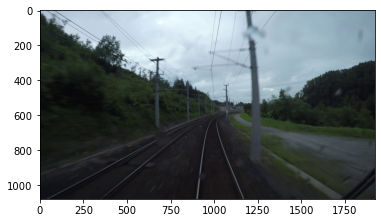

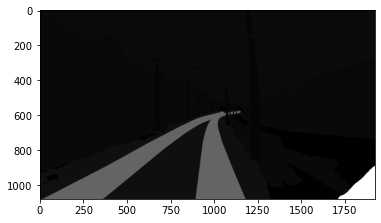

Rail Proportion: 0.08134307484567901


In [71]:
orig_img = cv2.imread('railsem19_data/jpgs/rs19_val/rs00000.jpg')
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.show()

# Interesting for us:
# 12: 'Rail Track (between two rails used exclusively by rail vehicles to drive on)',
# 17: 'Metal rail, both rails and guard rails, not drivable by cars',

img = cv2.imread('railsem19_data/uint8/rs19_val/rs00000.png', 0)
img[img == 12] = 100
img[img == 17] = 100
plt.imshow(img, cmap='gray')
plt.show()

print("Rail Proportion:", (img == 100).sum() / len(img.ravel()))